<a href="https://colab.research.google.com/github/AgustinSiben/AprMaq/blob/main/Trabajo_Practico_5_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clientes al por mayor
El objetivo de este proyecto es identificar y describir los distintos segmentos de clientes ocultos en los datos en función de su gasto anual en diversas categorías de productos, como leche, comestibles, región, etc.

In [34]:
import pandas as pd
import seaborn as sns

customers = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [35]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Elimino lops parámetros de region y canal

In [36]:
del customers['Channel'],customers['Region']
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Grafico el conjunto de todas las compras

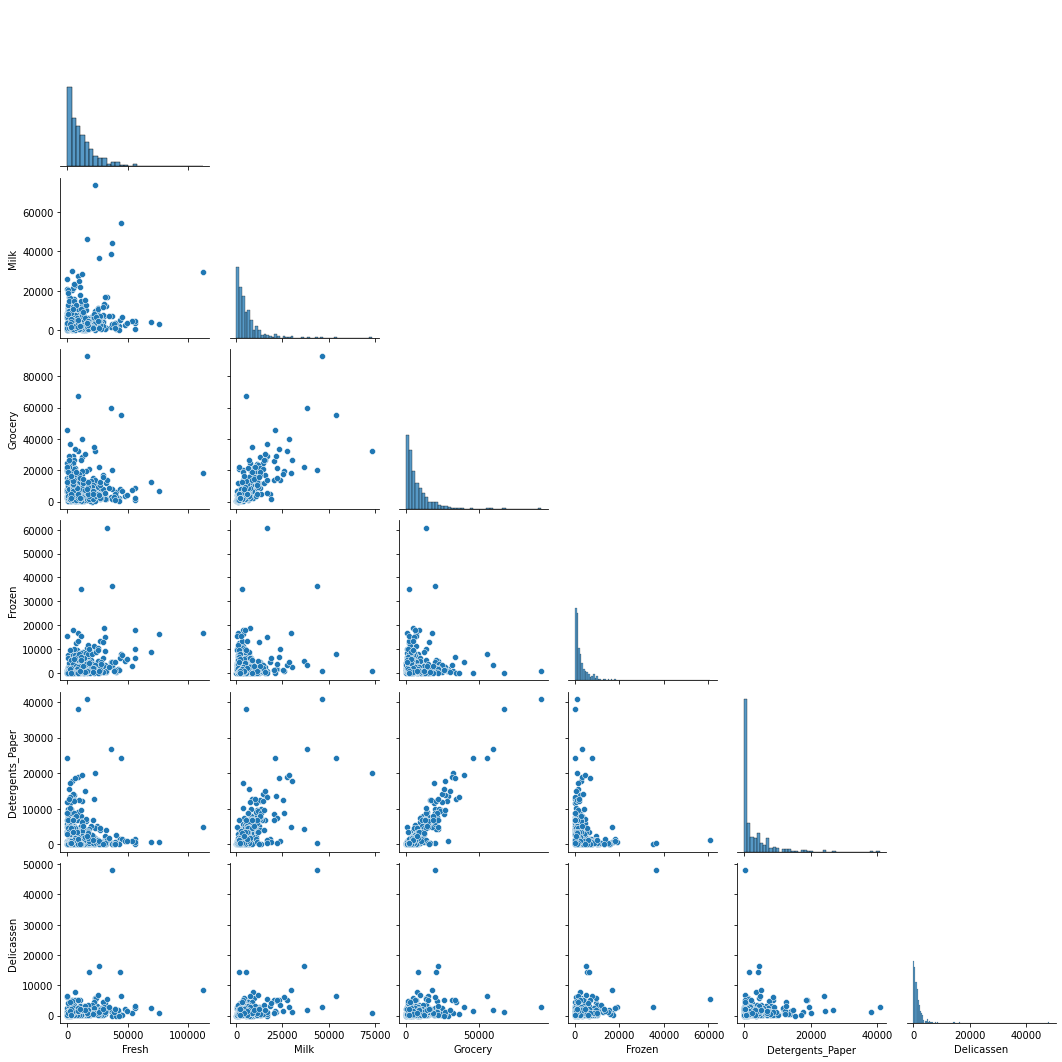

In [37]:
sns.pairplot(customers, corner = True);

Normalizo los parametros para generar los clusters

In [38]:
from sklearn.preprocessing import  StandardScaler

Sc = StandardScaler()
customers_norm = Sc.fit_transform(customers)

Comparo dos metodos de clustering basados en la distancia entre puntos

##Comienzo usando K-means
Luego agrego los clusters al dataset original

In [39]:
from sklearn.cluster import KMeans

n = 3
kmeans = KMeans(n_clusters = n).fit(customers_norm)

customers_kmeans = customers.copy()
customers_kmeans['Clusters'] = kmeans.labels_
customers_kmeans.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


La cantidad de datos pertenecientes a cada Cluster es:

In [40]:
customers_kmeans['Clusters'].value_counts()

1    322
0    106
2     12
Name: Clusters, dtype: int64

Grafico mostrando los distintos clusters de K-Means con los valores originales de los datos, es decir sin normalizar

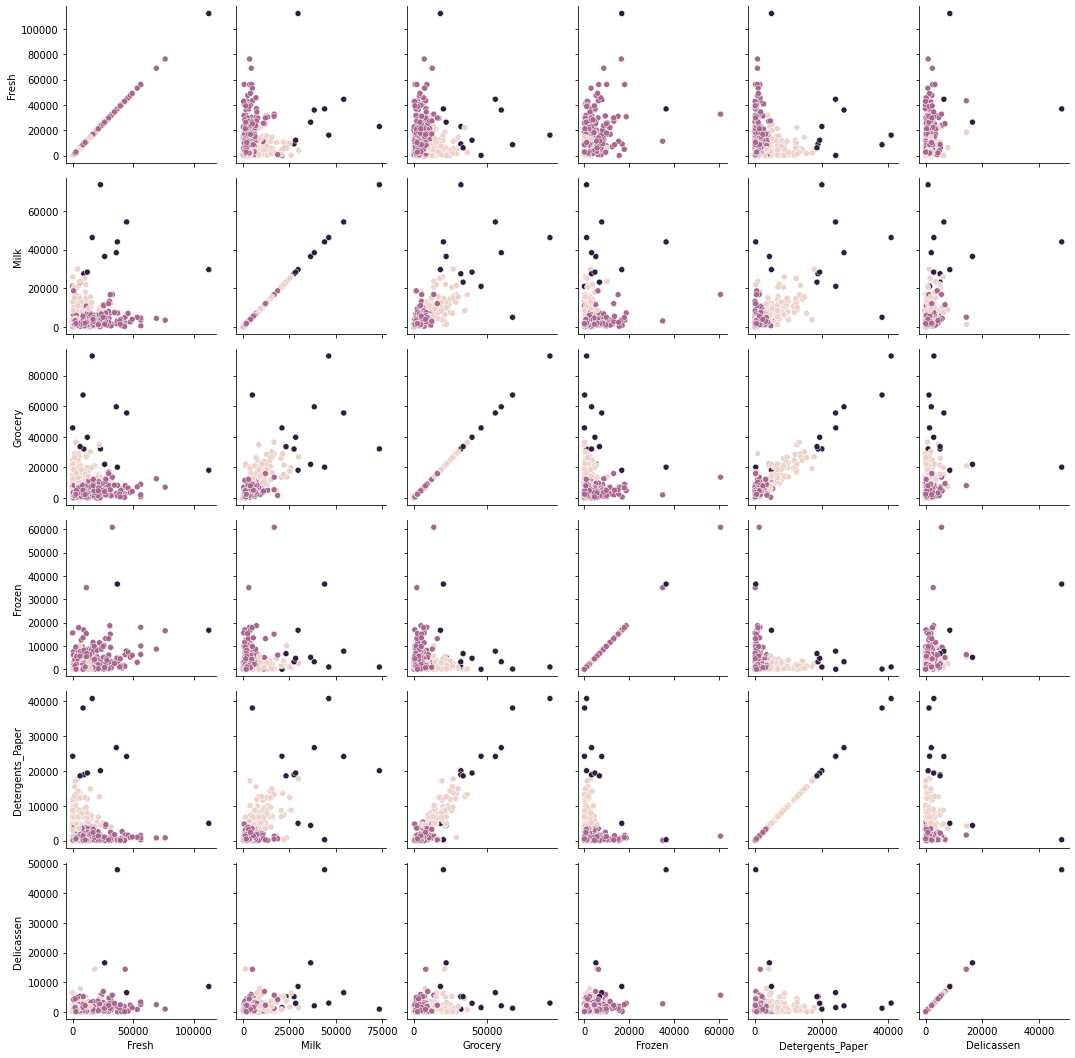

In [41]:
g = sns.PairGrid(customers_kmeans[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])
g.map(sns.scatterplot,hue='Clusters',data=customers_kmeans);

##Ahora comparo con Mean-shift

In [42]:
from sklearn.cluster import MeanShift

meanshift = MeanShift().fit(customers_norm)

customers_meansshift = customers.copy()
customers_meansshift['Clusters'] = meanshift.labels_
customers_meansshift.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


La cantidad de datos pertenecientes a cada Cluster es:

In [43]:
customers_meansshift['Clusters'].value_counts()

0     404
14     13
1      11
13      1
12      1
11      1
10      1
9       1
8       1
7       1
6       1
5       1
4       1
3       1
2       1
Name: Clusters, dtype: int64

Mean-Shift es para un gran número de clusters por eso genera tantos con tan pocos valores a diferencia de K-Means que los clusters tenian mas valores

Grafico mostrando los distintos clusters de Means-Shift con los valores originales de los datos, es decir sin normalizar.

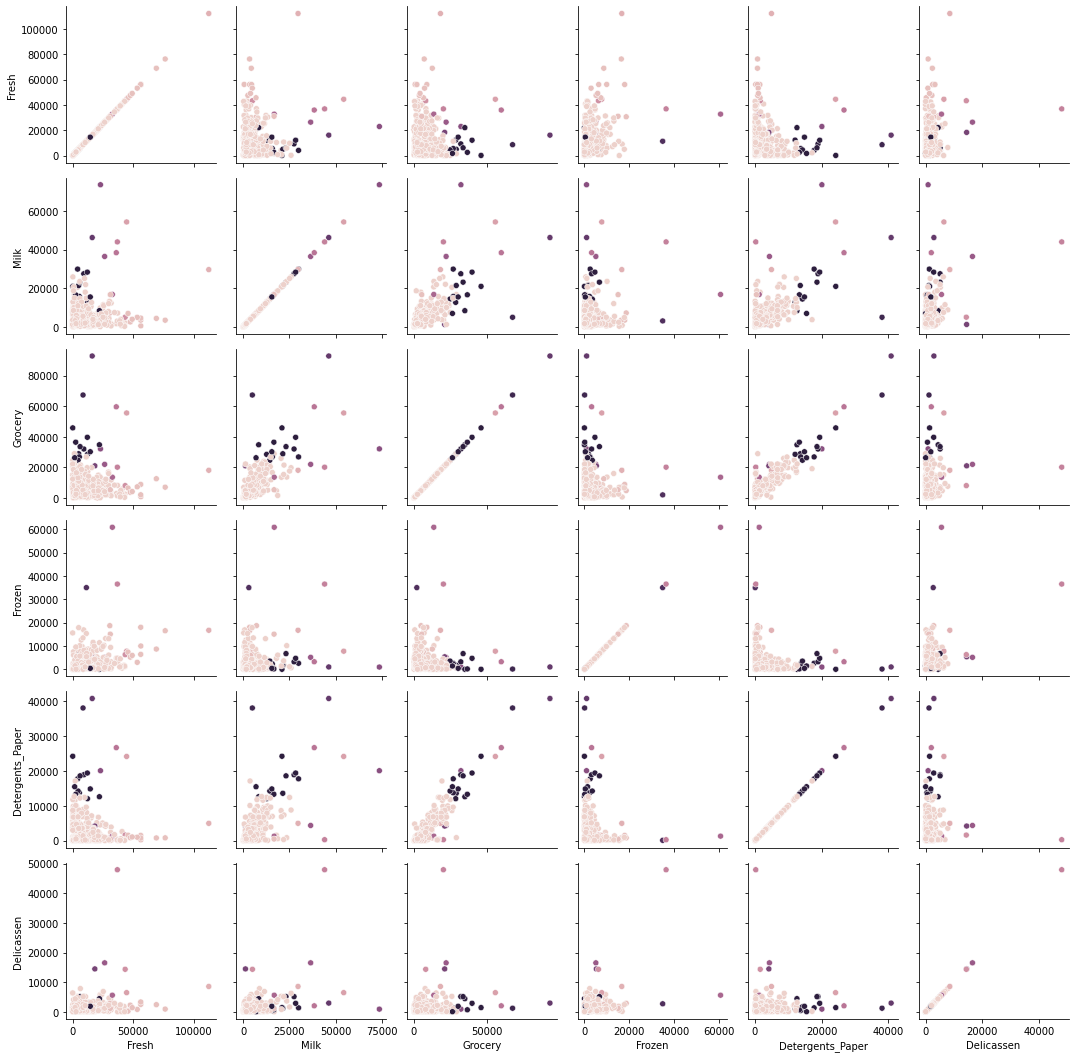

In [44]:
g = sns.PairGrid(customers_meansshift[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])
g.map(sns.scatterplot,hue='Clusters',data=customers_meansshift);

##Comparación

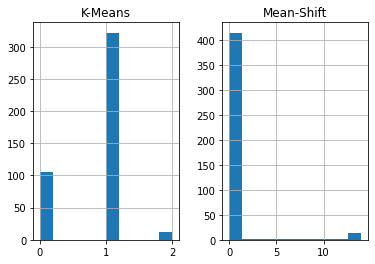

In [45]:
comp = pd.DataFrame({'K-Means': kmeans.labels_,'Mean-Shift': meanshift.labels_})
comp.hist();

El grupo 1 de K-Means y el grupo 0 de Mean-Shift son los mayoritarios, sobre esos analizo cuantos pertenecen al mismo grupo.

In [46]:
count = 0
for i in range(comp.shape[0]):
    if comp.iloc[i,0] == 1 and comp.iloc[i,1] == 0:
        count+=1
print('El grupo 1 de K-Means tiene 386 datos, de los cuales {} están en el grupo 0 de Mean-Shift'.format(count))

El grupo 1 de K-Means tiene 386 datos, de los cuales 308 están en el grupo 0 de Mean-Shift


El grupo 1 de K-Means tiene 386 datos, de los cuales {} están en el grupo 0 de Mean-Shift, se puede ver como estos grupos son muy similares ya que ambos algoritmos los caracterizaron de la misma forma